# Práctica 0

### Juan Carlos Villanueva Quirós y Jorge Villarrubia Elvira

### Breve descripción de la práctica
En esta práctica calcularemos el valor de la integral de una función f(x) entre a y b, asumiendo que f(x) es integrable y positiva en el intervalo [a,b].

Utilizaremos el método de Montecarlo basado en generar un gran número de puntos aletorios en el rectángulo [a,b] x [0,M], aproximando el valor de la integral (área bajo la curva), por el porcentaje de puntos que caen por debajo de la función:  

   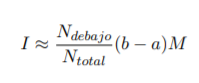
   
Para distintas cantidades de puntos, compararemos los tiempos entre el método implementado mediante un bucle y el método implementado mediante operaciones vectoriales de Numpy, extrayendo las conclusiones oportunas.

### Implementación con bucle

Comenzamos por declarar la función f(x) = sin(x) que utilizaremos en adelante como ejemplo y los extremos a = 0 y b = pi del intervalo donde la integraremos.

In [1]:
import numpy as np
fun = lambda x : np.sin(x)
a = 0
b = np.pi

Desarrollamos la función que calcula la integral. Tenganse en cuenta las siguientes cosas:

- El máximo de la función M en el intervalo [a,b] se obtiene evaluandola en muchos puntos (10000) equiespaciados en el intervalo [a,b] y asumiendo que la evaluación mayor es el máximo de la función en el intervalo.

- Hay un bucle con num_puntos iteraciones que icremente un contador en caso de que el correspondiente punto de R^2 generado aleatoriamente caiga por debajo de la curva.

- Se calcula el tiempo que tarda la función en hacer el cálculo y se devuelve como segundo valor de la tupla.

In [2]:
import time

from scipy.integrate import quad

def integra_mc(fun, a, b, num_puntos=10000):
    
    """ Integra la función positiva 'fun' en el intervalo [a,b] mediante 
    el método de Montecarlo con un bucle. Devuelve una tupla con el valor
    de la integral, el tiempo en milisegundos invertido en el cálculo y 
    las coordenadas x e y generadas aleatoriamente en el método."""
    
    tic = time.process_time()
    contador = 0
    M = fun(np.linspace(a,b, 10000)).max()
    x = np.random.uniform(a,b,num_puntos)
    y = np.random.uniform(0,M,num_puntos)
    for punto in range(num_puntos):
        if y[punto] < fun(x[punto]):
            contador += 1
    toc = time.process_time()
    return contador/num_puntos*(b-a)*M, 1000*(toc - tic), x, y

Para un número razonable de 500 puntos (razonable para representar) llamamos a la función con el propósito de representar la distribución de puntos en el rectángulo junto a la gráfica de la función.

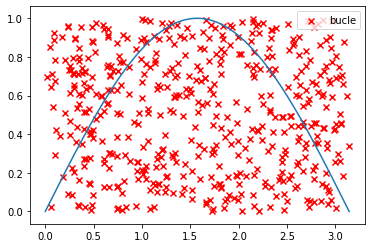

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
_,_,x,y = integra_mc(fun, a, b, 500)
plt.scatter(x, y, c = 'red', marker = 'x', label= 'bucle')
plt.legend()
puntos = np.linspace(a,b,100000)
plt.plot(puntos, fun(puntos))
plt.show()

Calculamos el valor de la integral llamando a nuestra función y a scipy.integrate.quad para comparar el valor de nuestra apoximación y el de python. Nuestro método se ejecutará con 100000 iteraciones para que sea más preciso que con las 500 de antes.

In [4]:
int_mc,_,_,_ = integra_mc(fun, a, b, 100000)
print ('Valor obtenido con Montecarlo: {}'.format(int_mc))
int_py,_ = quad(fun, a, b)
print ('Valor obtenido por Pyhton: {}'.format(int_py))
error = abs(int_mc - int_py)
print ('Error obtenido con respecto a integral de python: {}'.format(error))

Valor obtenido con Montecarlo: 2.0056241412299145
Valor obtenido por Pyhton: 2.0
Error obtenido con respecto a integral de python: 0.005624141229914503


Como hemos podido observar el error es mínimo y el método aproxima adecuadamente

### Implementación con operaciones vectoriales Numpy

Hacemos una función que haga lo mismo que antes pero que para cotar cuantos puntos caen por debajo de la curva utlice operaciones vectoriales Numpy. Con y < y_funcion se construye un array Numpy de booleanos indicando si el punto cae o no por debajo de la gráfica de f y con np.sum contamos cuantos 'True' hay en ese array.

Lo demás es análogo a la otra función.

In [5]:
def integra_mc_fast(fun, a, b, num_puntos=10000):
    
    """ Integra la función positiva 'fun' en el intervalo [a,b] mediante 
    el método de Montecarlo con operaciones vectoriales Numpy. 
    Devuelve una tupla con el valor de la integral, el tiempo en milisegundos
    invertido en el cálculo y las coordenadas x e y generadas aleatoriamente
    en el método."""
    
    tic = time.process_time()
    M = fun(np.linspace(a,b, 10000)).max()
    x = np.random.uniform(a,b,num_puntos)
    y = np.random.uniform(0,M,num_puntos)
    y_funcion = fun(x)
    contador = np.sum(y < y_funcion)
    toc = time.process_time()
    return contador/num_puntos*(b-a)*M, 1000*(toc - tic), x, y

Representamos de nuevo los puntos y la gráfica.

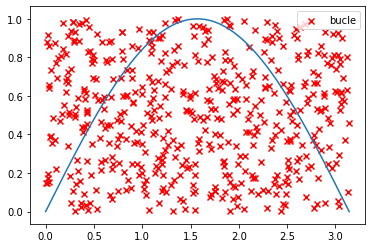

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
_,_,x,y = integra_mc_fast(fun, a, b, 500)
plt.scatter(x, y, c = 'red', marker = 'x', label= 'bucle')
plt.legend()
puntos = np.linspace(a,b,100000)
plt.plot(puntos, fun(puntos))
plt.show()

Comparamos de nuevo el valor de la integral con el que calcula pyhton volviedo a comprobar que el error es muy pequeño.

In [7]:
int_mc,_,_,_ = integra_mc_fast(fun, a, b, 100000)
print ('Valor obtenido con Montecarlo: {}'.format(int_mc))
int_py,_ = quad(fun, a, b)
print ('Valor obtenido por Pyhton: {}'.format(int_py))
error = abs(int_mc - int_py)
print ('Error obtenido con respecto a integral de python: {}'.format(error))

Valor obtenido con Montecarlo: 2.009896707186075
Valor obtenido por Pyhton: 2.0
Error obtenido con respecto a integral de python: 0.009896707186074938


### Comparación de tiempos
Finalmente comparamos el tiempo de ambas implementaciones para varios valores del número de puntos aleatorios. Concretamente valores de 1000 a 100000 con paso 5000.

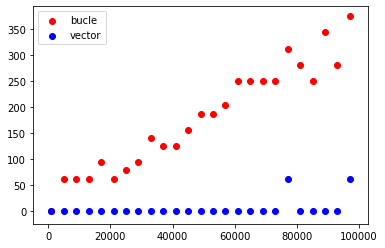

In [8]:
sizes = range(1000, 100000, 4000)
times_bucle = [integra_mc(fun, a, b, num_puntos)[1] for num_puntos in sizes]
times_fast = [integra_mc_fast(fun, a, b, num_puntos)[1] for num_puntos in sizes]
plt.figure()
plt.scatter(sizes, times_bucle, c = 'red', label= 'bucle')
plt.scatter(sizes, times_fast, c = 'blue', label= 'vector')
plt.legend()
plt.show()

Aprenciamos como la implementación con bucle es más lenta. El tiempo que tarda crece aproximandamente de una forma linel con el número de puntos, mientras que con operaciones vectoriales el tiempo de cómputo es prácticamente constante independientemente del número de puntos. 

### Conclusiones

- Es mucho mejor utilizar operaciones vecoriales Numpy siempre que ses posible, ya que, como hemos podido comprobar, se comportan de forma práticamente constante independientemente del tamaño de los vectores a operar. Mientras que, una solución iterativa, para bucles con muchas iteraciones, tarda bastante más. El tiempo de cómputo con un bucle crece linealmente con el número de iteraciones.


- El método de Montecarlo para tamaños no excesivamente grandes de puntos aproxima bastante bien el valor exacto de una integral definida en las condiciones impuestas.